In [1]:
from google.colab import drive
drive.mount('/content/drive')

import sys
path = '/content/drive/MyDrive/Colab Notebooks/ICML2024'
sys.path.append(path)

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
list_seed = np.arange(1, 21) * 1000
prop = [0.6, 0.2]
list_t = np.arange(1, 192)

results_ARW, results_fixed = [], []
for seed in list_seed:
    tmp = np.loadtxt(path + '/results_housing/MSE_ARW_{}_{}_{}_full.txt'.format(seed, prop[0], prop[1]))
    results_ARW.append(tmp)
    tmp = np.loadtxt(path + '/results_housing/MSE_fixed_{}_{}_{}_full.txt'.format(seed, prop[0], prop[1]))
    results_fixed.append(tmp)


MSE_ARW_mean = np.zeros(results_ARW[0].shape)
MSE_fixed_mean = np.zeros(results_fixed[0].shape)

S = len(list_seed)
for i in range(S):
    MSE_ARW_mean += results_ARW[i] / S
    MSE_fixed_mean += results_fixed[i] / S



ARW: mean = 0.07072092084693345, standard error = 0.00021920679921822903
Fixed window 1: mean = 0.07068004940672244, standard error = 0.00014589073660988897
Fixed window 4: mean = 0.06941934369499149, standard error = 0.000184359027924136
Fixed window 16: mean = 0.07082462073741248, standard error = 0.00020233538006111997
Fixed window 64: mean = 0.09074500106455724, standard error = 0.00018031820663559994
Fixed window 256: mean = 0.09467342633718237, standard error = 0.0001941299512995413


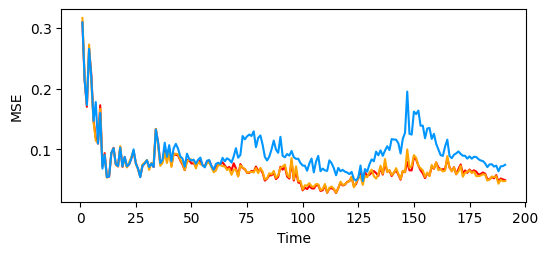

In [5]:

idx_start = 0 # which day to start

# plotting
fig, ax = plt.subplots(1, 1, figsize = (6, 2.5))
ax.plot(list_t[idx_start:], MSE_ARW_mean[idx_start:], 'r')
ax.plot(list_t[idx_start:], MSE_fixed_mean[idx_start:, 0], color='#FFA500', markersize = 10)
ax.plot(list_t[idx_start:], MSE_fixed_mean[idx_start:, -1], color='#0096FF', markersize = 10)

plt.xlabel('Time')
plt.ylabel('MSE')

fig.savefig(path + '/results_{}_{}.pdf'.format(prop[0], prop[1]), format = 'pdf', dpi = 300, bbox_inches = 'tight')



S = len(list_seed)
ARW_seed = np.zeros(S)
fixed_seed = np.zeros((5, S))
window_sizes_val = [1, 4, 16, 64, 256]

for i in range(S):
    ARW_seed[i] = np.mean(results_ARW[i][idx_start:])
    for k in range(5):
        fixed_seed[k, i] = np.mean(results_fixed[i][idx_start:, k])

print('ARW: mean = {}, standard error = {}'.format( np.mean(ARW_seed), np.std(ARW_seed) / np.sqrt(S) ))
for k in range(5):
    print('Fixed window {}: mean = {}, standard error = {}'.format( window_sizes_val[k], np.mean(fixed_seed[k]), np.std(fixed_seed[k]) / np.sqrt(S) ))
